In [1]:
### Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [2]:
# Load the dataset
file_path = "C:/Users/varun/Downloads/Company_Data (3).csv"
data = pd.read_csv(file_path)

In [3]:
# Display first 5 rows to understand the data
print("Dataset Preview:")
print(data.head())

Dataset Preview:
   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  


In [4]:
# Basic info
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB
None


In [5]:
# Summary statistics
print("\nSummary Statistics:")
print(data.describe())



Summary Statistics:
            Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.00000

In [6]:
# Summary statistics
print("\nSummary Statistics:")
print(data.describe())

### Step 2: Exploratory Data Analysis (EDA)
# Check for missing values
print("\nMissing Values in Dataset:")
print(data.isnull().sum())


Summary Statistics:
            Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.00000

In [10]:
# Handle non-numeric data before correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

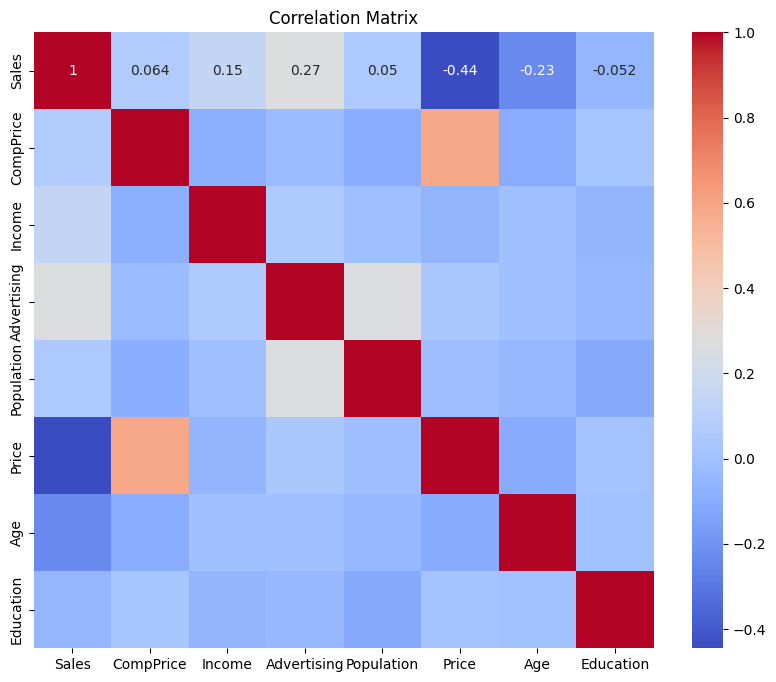

In [14]:
#visualize correlations between numerical variables
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

C:\Users\varun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\varun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\varun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\varun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

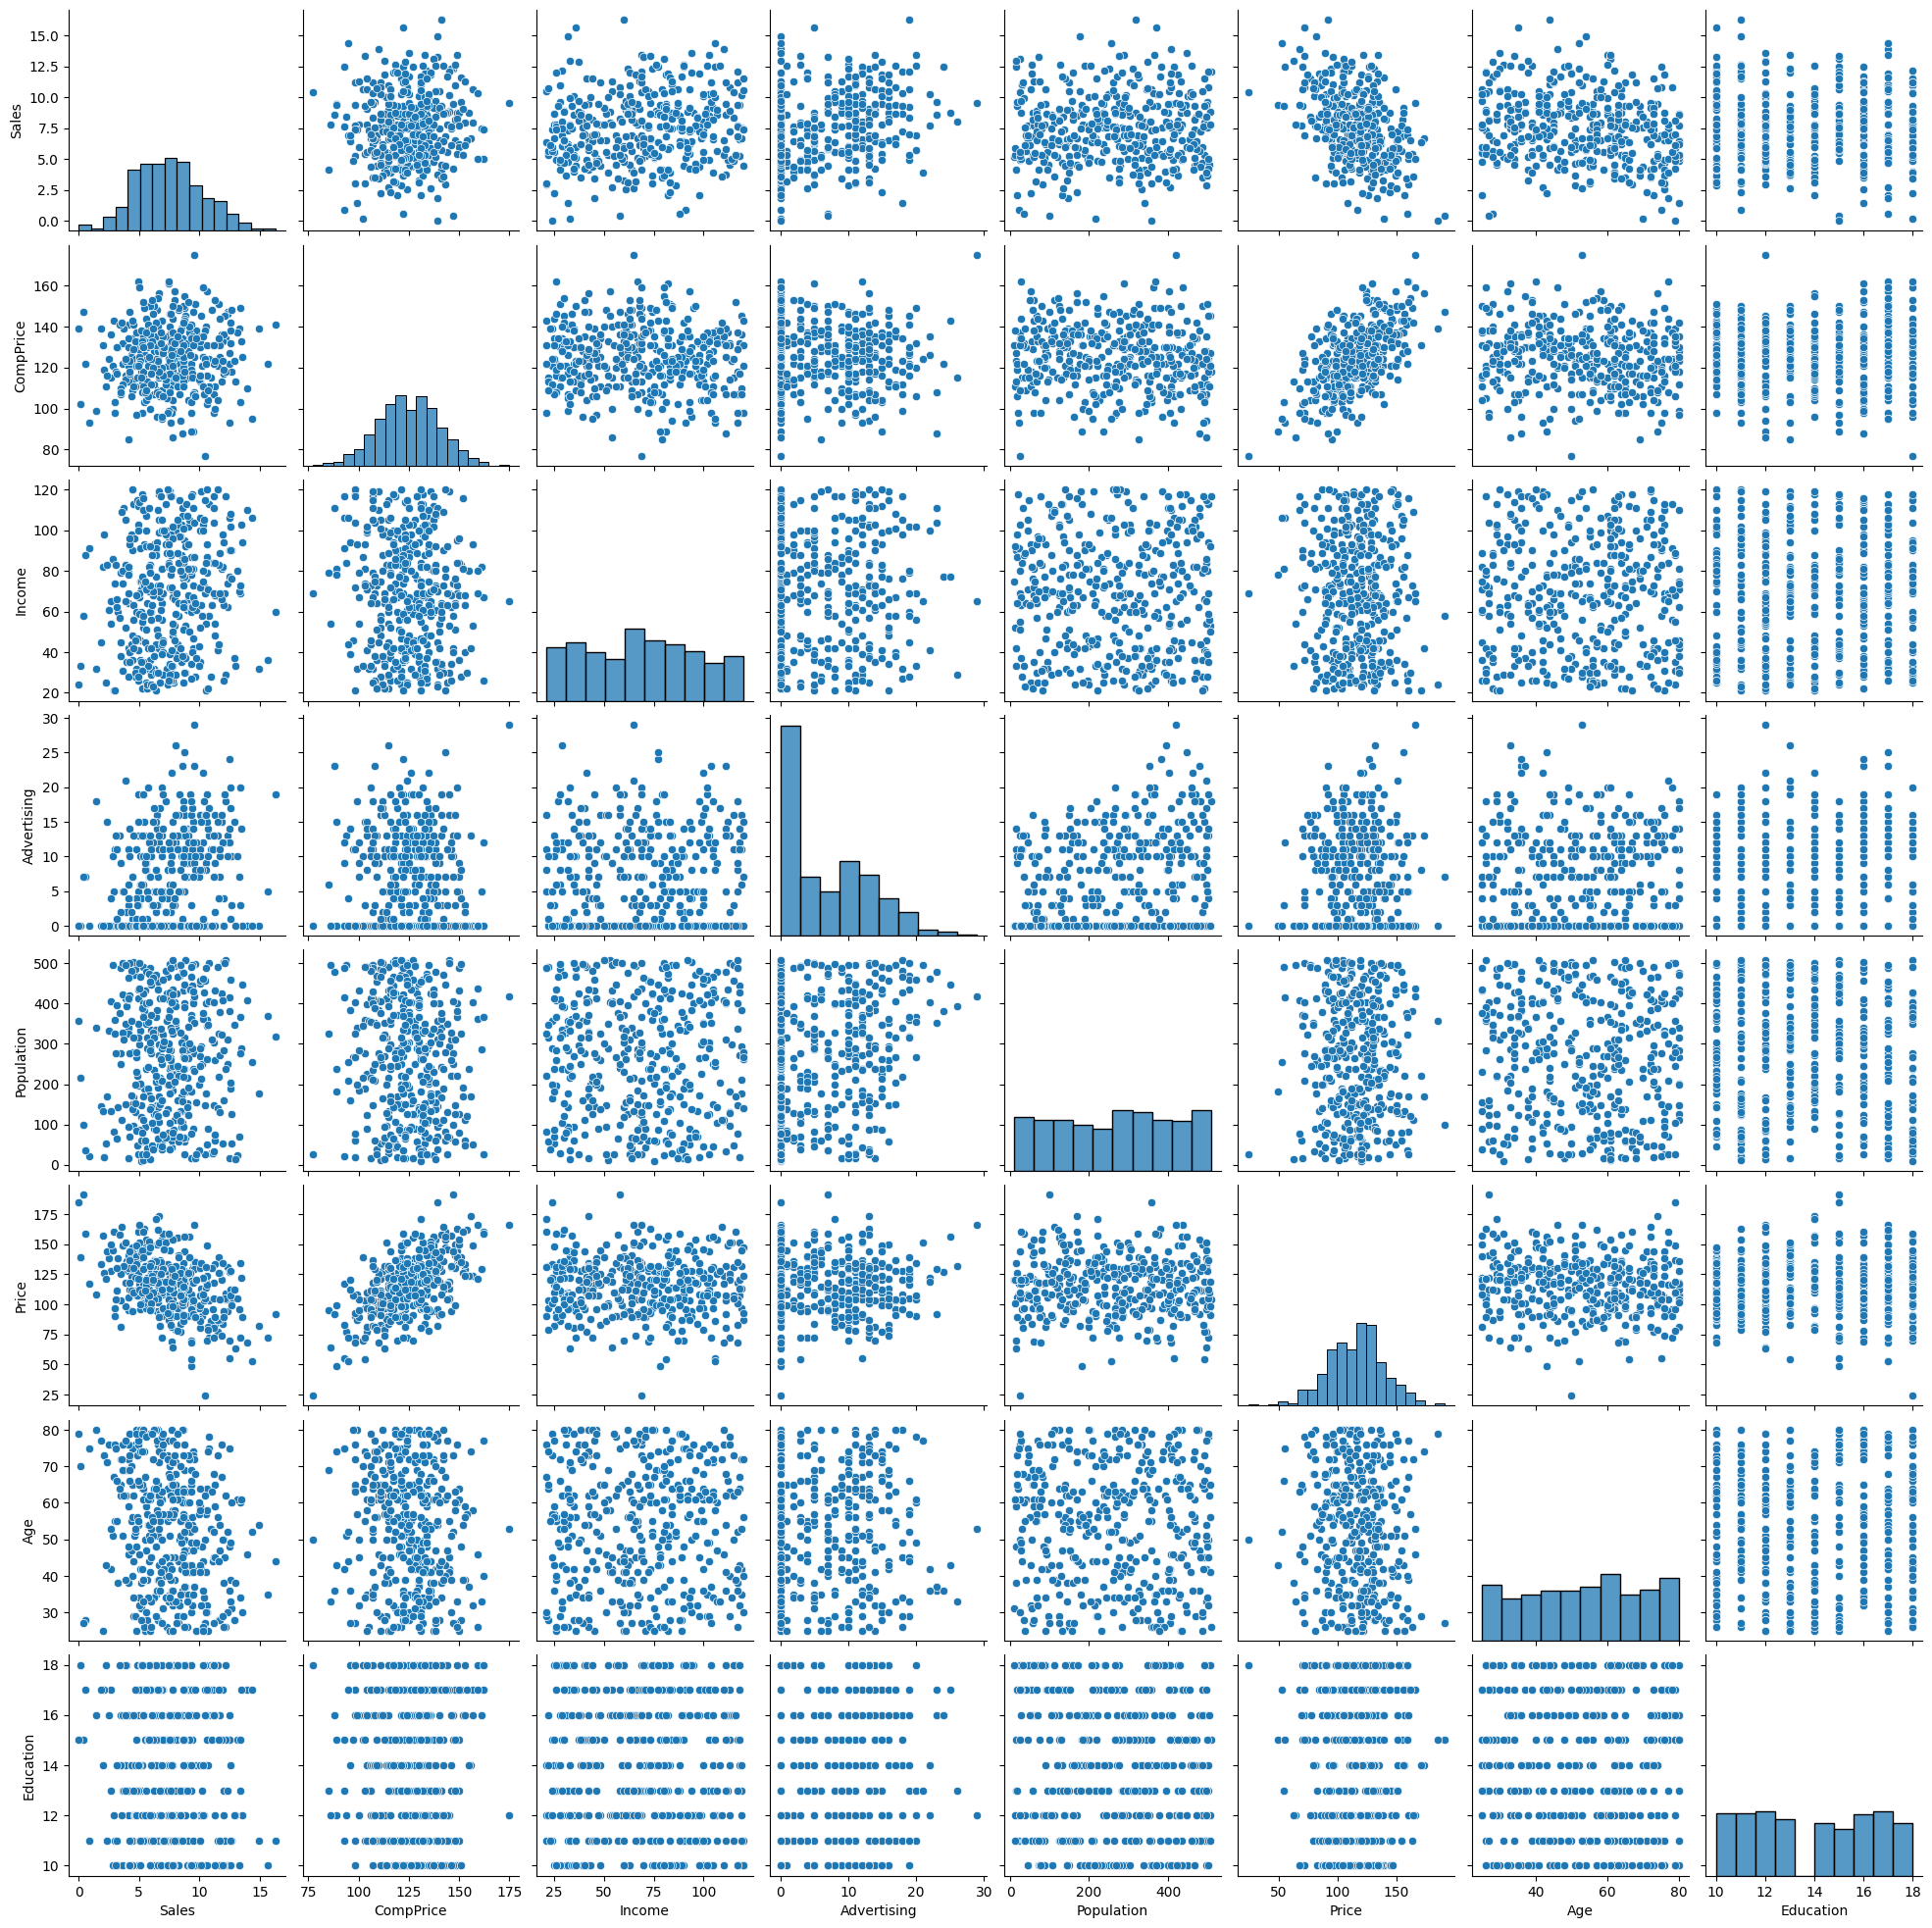

In [16]:
# Pairplot to observe relationships
sns.pairplot(numeric_data)
plt.show()

C:\Users\varun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


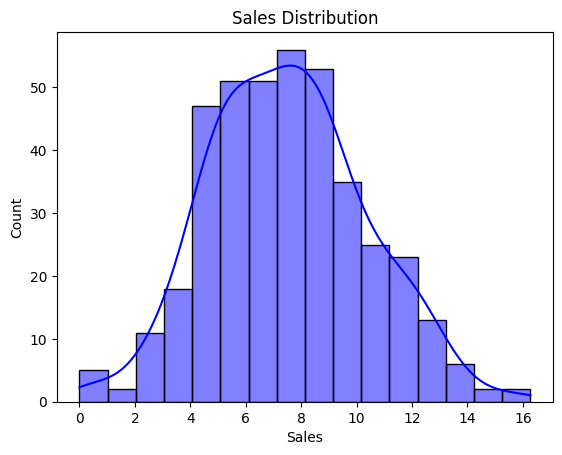

In [17]:
# Sales Distribution
sns.histplot(data['Sales'], kde=True, color='blue')
plt.title("Sales Distribution")
plt.show()

In [18]:
### Step 3: Data Preprocessing
# One-Hot Encoding for categorical variables
print("\nColumns in the dataset:", data.columns)
data = pd.get_dummies(data, columns=['ShelveLoc', 'Urban', 'US'], drop_first=True)



Columns in the dataset: Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')


In [19]:
# Check after preprocessing
print("\nDataset after preprocessing:")
print(data.head())


Dataset after preprocessing:
   Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0   9.50        138      73           11         276    120   42         17   
1  11.22        111      48           16         260     83   65         10   
2  10.06        113      35           10         269     80   59         12   
3   7.40        117     100            4         466     97   55         14   
4   4.15        141      64            3         340    128   38         13   

   ShelveLoc_Good  ShelveLoc_Medium  Urban_Yes  US_Yes  
0           False             False       True    True  
1            True             False       True    True  
2           False              True       True    True  
3           False              True       True    True  
4           False             False       True   False  


In [20]:
### Step 4: Define Features (X) and Target (y)
X = data.drop('Sales', axis=1)  # Drop the target variable 'Sales'
y = data['Sales']              # Define the target variable

In [31]:
# Ensure all features are numeric
X = X.apply(pd.to_numeric, errors='coerce')


In [47]:
# Drop rows with missing values caused by coercion
X = X.dropna()
y = y.loc[X.index]


In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
print("\nTraining data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (320, 11)
Testing data shape: (80, 11)


In [50]:
### Step 5: Build Multiple Linear Regression Models
# Model 1: Using all features
model1 = LinearRegression()
model1.fit(X_train, y_train)


LinearRegression()

In [51]:
# Predict and evaluate on test data
y_pred1 = model1.predict(X_test)
print("\nModel 1 Coefficients:", model1.coef_)
print("Model 1 Intercept:", model1.intercept_)

mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)
print(f"Model 1 - Mean Squared Error: {mse1:.2f}")
print(f"Model 1 - R-squared: {r2_1:.2f}")



Model 1 Coefficients: [ 8.97058179e-02  1.50004453e-02  1.28179675e-01  2.13076774e-04
 -9.55056151e-02 -4.81135040e-02 -2.22052106e-02  4.85234981e+00
  2.03981146e+00  1.35156789e-01 -3.05042820e-01]
Model 1 Intercept: 6.242482533877048
Model 1 - Mean Squared Error: 1.10
Model 1 - R-squared: 0.89


In [52]:
# Model 2: Removing features with low correlation
# Example: Keep only significant features identified from EDA
significant_features = ['CompPrice', 'Income', 'Advertising', 'Price', 'ShelveLoc_Good', 'ShelveLoc_Medium']
X_train_2 = X_train[significant_features]
X_test_2 = X_test[significant_features]

model2 = LinearRegression()
model2.fit(X_train_2, y_train)

LinearRegression()

In [53]:
# Predict and evaluate
y_pred2 = model2.predict(X_test_2)
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)


In [54]:
print("\nModel 2 - Coefficients:", model2.coef_)
print(f"Model 2 - Mean Squared Error: {mse2:.2f}")
print(f"Model 2 - R-squared: {r2_2:.2f}")



Model 2 - Coefficients: [ 0.09401779  0.01651047  0.11922809 -0.09434452  4.74299353  1.90732228]
Model 2 - Mean Squared Error: 1.39
Model 2 - R-squared: 0.86


In [41]:
### Step 6: Model Evaluation
print("\nFinal Evaluation on Test Set:")
print(f"Model 1 - R2 Score: {r2_1:.2f}, MSE: {mse1:.2f}")
print(f"Model 2 - R2 Score: {r2_2:.2f}, MSE: {mse2:.2f}")



Final Evaluation on Test Set:
Model 1 - R2 Score: 0.89, MSE: 1.10
Model 2 - R2 Score: 0.86, MSE: 1.39


C:\Users\varun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


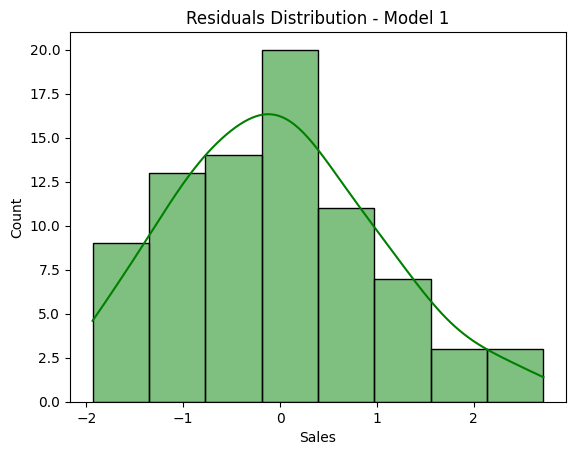

In [42]:
### Step 7: Assumptions Check
# Residuals Analysis for Model 1
residuals = y_test - y_pred1
sns.histplot(residuals, kde=True, color='green')
plt.title("Residuals Distribution - Model 1")
plt.show()

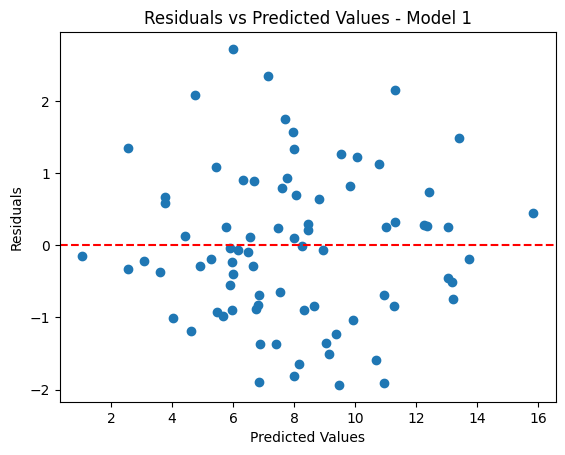

In [43]:
# Scatter plot of residuals vs. predicted values
plt.scatter(y_pred1, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Predicted Values - Model 1")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()